In [1]:
import altair as alt

In [2]:
alt.renderers.enable('mimetype')
# alt.renderers.enable('default')
# alt.renderers.enable('notebook')

RendererRegistry.enable('mimetype')

In [5]:
from vega_datasets import data

In [50]:
# cars = alt.load_dataset('cars')
cars = data.cars()
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.Color('Origin', scale=alt.Scale(scheme='accent'), sort=alt.Sort()),
)


<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [25]:
melted_cars = cars.melt(id_vars=['Name', 'Year', 'Origin'])

In [27]:
alt.Chart(melted_cars).mark_line().encode(
    x='Year',
    y='value',
    color='variable',

)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [9]:
import pandas as pd

In [10]:
humanist_vols = pd.read_csv('web_scraped_humanist_listserv.csv')

In [11]:
humanist_vols['humanities_computing_counts'] = humanist_vols['text'].str.count('Humanities Computing')
humanist_vols['digital_humanities_counts'] = humanist_vols['text'].str.count('Digital Humanities')

<AxesSubplot:>

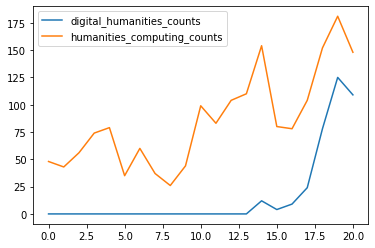

In [12]:
counts = humanist_vols[['digital_humanities_counts', 'humanities_computing_counts']]
counts.plot()

In [ ]:
alt.Chart(counts).mark_line().encode(
    x='dates'
    y='counts'
)

In [16]:
subset_humanist_vols = humanist_vols[['dates', 'humanities_computing_counts','digital_humanities_counts', 'url']]
subset_humanist_vols[0:1]

,dates,humanities_computing_counts,digital_humanities_counts,url
0,1987-1988,48,0,https://humanist.kdl.kcl.ac.uk/Archives/Conver...


In [28]:
melted_humanist_vols = subset_humanist_vols.melt(id_vars=['dates', 'url'])

In [29]:
melted_humanist_vols.variable.unique()

array(['humanities_computing_counts', 'digital_humanities_counts'],
      dtype=object)

In [36]:
melted_humanist_vols['year'] = melted_humanist_vols.dates.str.split('-').str[0]
melted_humanist_vols['year'] = pd.to_datetime(melted_humanist_vols['year'], format='%Y')

In [37]:
melted_humanist_vols.dtypes

dates               object
url                 object
variable            object
value                int64
year        datetime64[ns]
dtype: object

In [47]:
word_counts_chart = alt.Chart(melted_humanist_vols).mark_line().encode(
    x='year:T',
    y='value:Q',
    color='variable:N',
    tooltip=['value:Q', 'variable:N', 'dates', 'url']
)

In [44]:
humanist_vols['volume_size'] = humanist_vols['text'].str.count('\n')
subset_humanist_volume_size = humanist_vols[['volume_size', 'dates']]

In [46]:
volume_size_chart = alt.Chart(subset_humanist_volume_size).mark_bar().encode(
    x='dates',
    y='volume_size',
)


In [48]:
alt.hconcat(word_counts_chart, volume_size_chart)

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [49]:
volume_size_chart

<VegaLite 4 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html
